In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical

import tensorflow as tf

import time
import threading

import numpy as np

In [18]:
targets = [1000003437, 1000003407, 1000003400, 1000003404, 1000003402]
label_encoder = LabelEncoder()
label_encoder.fit(targets)

LabelEncoder()

In [8]:
with open('wine_Xtrain.npy', 'rb') as np_in:
    Xread= np.load(np_in)

In [9]:
with open('wine_ytrain.npy', 'rb') as np_yin:
    Yread= np.load(np_yin)

In [10]:
# Import the data 

Xread

array([[[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ..., 
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ..., 
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ..., 
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        ..., 
        [[ 1.        ,  1.        ,

In [12]:
Yread

array([[0],
       [4],
       [0],
       ..., 
       [1],
       [4],
       [4]])

In [13]:
X = Xread
y= Yread

In [14]:
y = to_categorical(y)

In [60]:
y.shape

(6660, 5)

In [61]:
y

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [15]:
# Update the train-test-split size 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

X_train = X_train.reshape(X_train.shape[0], 180, 180, 3)
X_test = X_test.reshape(X_test.shape[0], 180, 180, 3)



In [44]:
# Model_1

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16, (4,4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 4995 samples, validate on 1665 samples
Epoch 1/5
4995/4995 [==============================] - 348s 70ms/step - loss: 0.8416 - acc: 0.6977 - val_loss: 0.7189 - val_acc: 0.7207
Epoch 2/5
4995/4995 [==============================] - 329s 66ms/step - loss: 0.5221 - acc: 0.8218 - val_loss: 0.5412 - val_acc: 0.8162
Epoch 3/5
4995/4995 [==============================] - 240s 48ms/step - loss: 0.3753 - acc: 0.8723 - val_loss: 0.5146 - val_acc: 0.8312
Epoch 4/5
4995/4995 [==============================] - 219s 44ms/step - loss: 0.2728 - acc: 0.9079 - val_loss: 0.5868 - val_acc: 0.8090
Epoch 5/5
4995/4995 [==============================] - 237s 47ms/step - loss: 0.2129 - acc: 0.9287 - val_loss: 0.6312 - val_acc: 0.8360


In [43]:
keras.callbacks.History()

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 176, 176, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                903200    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total para

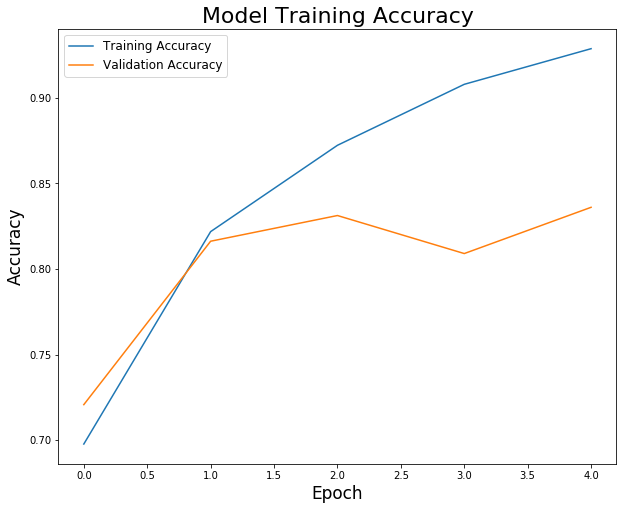

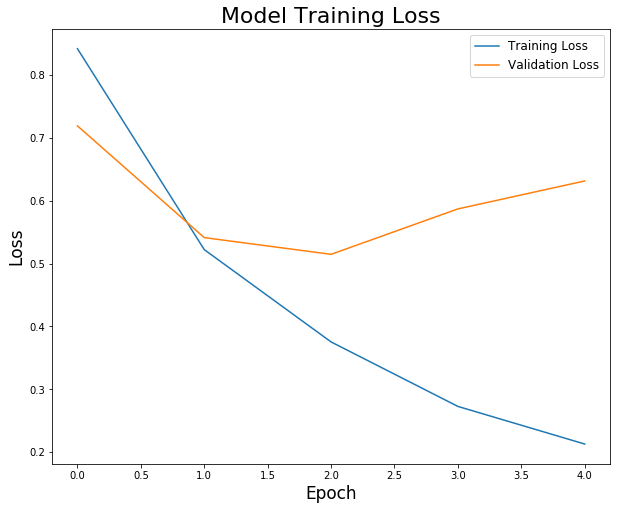

In [48]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_1.history['acc'])
plt.plot(model_1.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

In [69]:
# Import the Testing Data
with open('wine_Xtest.npy', 'rb') as np_in_test:
    Xt_in= np.load(np_in_test)


In [70]:
Xt_in.shape

(1256, 180, 180, 3)

In [88]:
with open('wine_ytest_fixed.npy', 'rb') as np_in_ytest_fixed:
    yt_fixed = np.load(np_in_ytest_fixed)

In [89]:
yt_fixed.shape

(1256,)

In [90]:
yt_en = label_encoder.transform(yt_fixed)

In [91]:
yt_cats = to_categorical(yt_en)

In [92]:
yt_cats.shape

(1256, 5)

In [67]:
# with open('wine_ytest.npy', 'rb') as np_in_ytest:
#     y_in= np.load(np_in_ytest)

In [68]:
# y_in.shape

(6280, 2)

In [74]:
# pd.Series(y_in[:,1]).value_counts()

0.0    5024
1.0    1256
dtype: int64

In [54]:
Xt = Xt_in
# yt= to_categorical(y_in)

In [57]:
Xt.shape

(1256, 180, 180, 3)

In [58]:
# yt.shape

(12560, 2)

In [59]:
# yt

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [ ]:
model.fit(X, y, validation_data=(Xt, yt_cats), epochs=5)

Train on 6660 samples, validate on 1256 samples
Epoch 1/5
6660/6660 [==============================] - 284s 43ms/step - loss: 0.2993 - acc: 0.9030 - val_loss: 4.2981 - val_acc: 0.3758
Epoch 2/5
4032/6660 [=================>............] - ETA: 1:32 - loss: 0.1868 - acc: 0.9397

In [ ]:
#!ls -lrth

In [ ]:
#Build predictions
model.predict_classes(Xt, 32, verbose=1)

In [ ]:
# Build Confusion Matrix


In [ ]:
# Import Model II Stuff 

model2 = Sequential()
model2.add(Conv2D(16, (2, 2), input_shape=(180, 180, 3), activation='relu'))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(32, (4,4), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(64, (4,4), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(y.shape[1], activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

In [ ]:
model2.summary()

In [ ]:
# # Build charts for Loss and Accuracy over the Epochs 
# # Model Fitting Accuracy
# plt.figure(figsize=(10,8))
# plt.plot(model.history['acc'])
# plt.plot(model.history['val_acc'])
# plt.title('Model Training Accuracy', fontsize=22)
# plt.xlabel('Epoch', fontsize=17)
# plt.ylabel('Accuracy', fontsize=17)
# plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
# plt.show()

# # Model Fitting Loss
# plt.figure(figsize=(10,8))
# plt.plot(model.history['loss'])
# plt.plot(model.history['val_loss'])
# plt.title('Model Training Loss', fontsize=22)
# plt.xlabel('Epoch', fontsize=17)
# plt.ylabel('Loss', fontsize=17)
# plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
# plt.show()

In [ ]:
model2.fit(X, y, validation_data=(Xt, yt), epochs=5)